In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
# Storing the data in the dataframe
df = pd.read_excel('UK_Vaccine.xlsx')

In [5]:
df.head()

,areaName,areaCode,year,month,Quarter,day,WorkingDay,FirstDose,SecondDose,ThirdDose
0,England,E92000001,2022.0,5,Q2,Mon,Yes,3034.0,3857.0,8747.0
1,England,E92000001,2022.0,5,Q2,Sun,No,5331.0,3330.0,4767.0
2,England,E92000001,2022.0,5,Q2,Sat,No,13852.0,9759.0,12335.0
3,England,E92000001,2022.0,5,Q2,Fri,Yes,5818.0,5529.0,10692.0
4,England,E92000001,2022.0,5,Q2,Thu,Yes,8439.0,6968.0,11701.0


In [6]:
# finding the number of rows and columns and the the number of
#total elements
df.size
df.shape

(904, 10)

# Question 1: Generate descriptive statistics for the dataset, and comment on the main trends.

In [7]:
#Generating the descriptive statistics for the data
df.describe()

,year,month,FirstDose,SecondDose,ThirdDose
count,903.000000,904.000000,900.000000,901.000000,898.000000
mean,2021.625692,5.946903,4994.323333,5574.125416,42529.570156
std,0.484212,4.146467,9651.335670,9174.101390,104877.579915
min,2021.000000,1.000000,0.000000,0.000000,0.000000
25%,2021.000000,2.000000,338.500000,478.000000,1313.500000
50%,2022.000000,4.000000,876.500000,971.000000,6992.000000
75%,2022.000000,11.000000,3653.250000,5770.000000,23464.750000
max,2022.000000,12.000000,115551.000000,48491.000000,830403.000000


# The dataset spans from 2021 to 2022, showcasing monthly fluctuations in vaccination activities. Notably, the mean counts for the first, second, and third doses have increased over time, with the highest counts observed in 2022. The variability in dose counts is evident, as reflected in substantial standard deviations and interquartile ranges. For the first dose, the mean count is 4994.32 (SD: 9651.34), ranging from 0 to 115,551. The second dose exhibits a mean count of 5574.13 (SD: 9174.10), ranging from 0 to 48,491. The third dose has a mean count of 42,529.57 (SD: 104,877.58), ranging from 0 to 830,403. These trends underscore the dynamic nature of vaccination efforts and the evolving patterns in dose administration.

# Question 2: Check any records with missing values and handle the missing data as appropriate

In [8]:
# Finding missing values and dealing with them
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   areaName    904 non-null    object 
 1   areaCode    904 non-null    object 
 2   year        903 non-null    float64
 3   month       904 non-null    int64  
 4   Quarter     903 non-null    object 
 5   day         903 non-null    object 
 6   WorkingDay  902 non-null    object 
 7   FirstDose   900 non-null    float64
 8   SecondDose  901 non-null    float64
 9   ThirdDose   898 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 70.8+ KB


# There are 18 missing values in total. The rows and columns containing these values will be dropped

In [9]:
# removes rows with any missing values
df.dropna(inplace=True)

In [10]:
# Calculating the descriptive statistics for the revised dataset 
#when the values are dropped
df.describe()

,year,month,FirstDose,SecondDose,ThirdDose
count,890.000000,890.000000,890.000000,890.000000,890.000000
mean,2021.631461,5.903371,5007.202247,5598.837079,42851.678652
std,0.482680,4.144153,9663.780953,9179.644516,105291.330792
min,2021.000000,1.000000,0.000000,0.000000,0.000000
25%,2021.000000,2.000000,340.000000,476.500000,1318.750000
50%,2022.000000,4.000000,882.000000,978.500000,7185.000000
75%,2022.000000,11.000000,3653.750000,6163.250000,23817.500000
max,2022.000000,12.000000,115551.000000,48491.000000,830403.000000


# Question 3A Distribution of one or more continuous variables

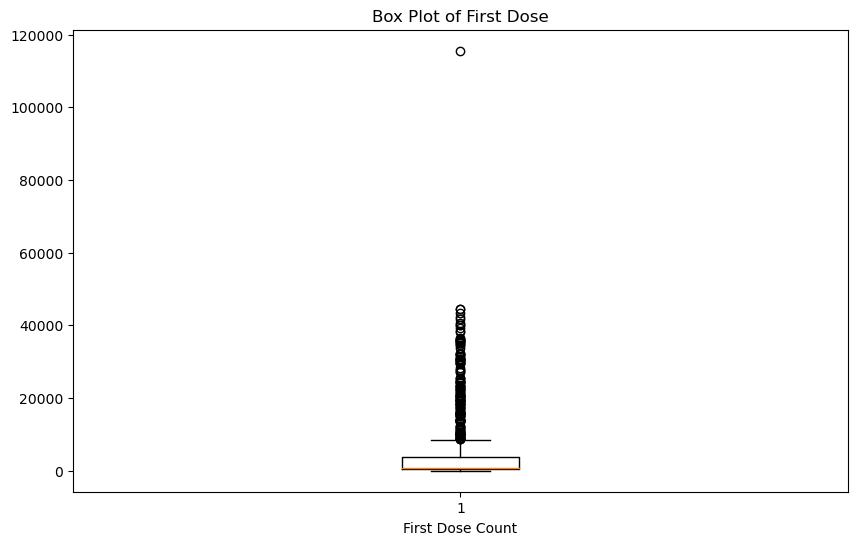

In [11]:
# Graph 1

# Plot a bigger box plot for 'FirstDose'
plt.figure(figsize=(10, 6))
plt.boxplot(df['FirstDose'], vert=True)
plt.title('Box Plot of First Dose')
plt.xlabel('First Dose Count')
plt.show()

# The minimum value is 0 and the maximum value is around 10,000. The median is around 1,000. The data has an outlier and the value of that outlier is 120,000. 

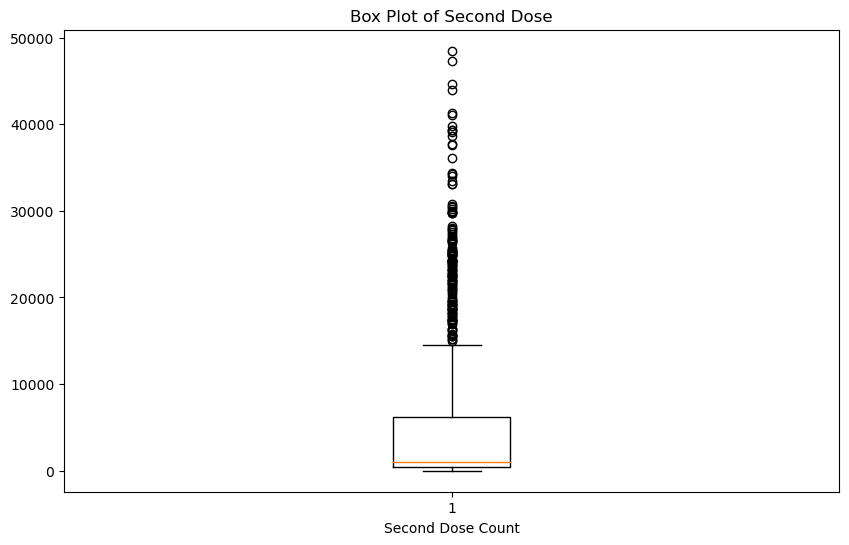

In [12]:
# Graph 2

# Plot a bigger box plot for 'SecondDose'
plt.figure(figsize=(10, 6))
plt.boxplot(df['SecondDose'], vert=True)
plt.title('Box Plot of Second Dose')
plt.xlabel('Second Dose Count')
plt.show()

# The minimum value is 0 and the maximum value is around 15,000. The middle value (Median) is around 1000. The data has few outliers at a value of 50,000

# Conclusion:
# By looking at Graph 1 and 2 it can be concluded that the range for second dose is higher than the range for the first dose

# Question 3B : the relationship of a pair of continuous variables

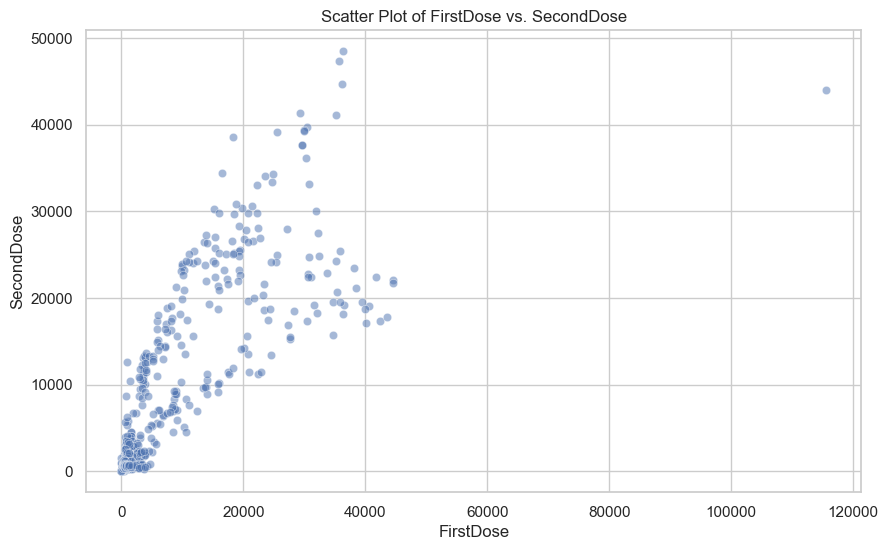

In [20]:

# Set the style for a cleaner look
sns.set(style="whitegrid")

# Plotting scatter plot without regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FirstDose', y='SecondDose', data=df, alpha=0.5)
plt.title('Scatter Plot of FirstDose vs. SecondDose')
plt.xlabel('FirstDose')
plt.ylabel('SecondDose')
plt.show()


# It can be seen from the above scatter plot that there is a positive correlation between the first dose and the second dose. To simplify, people who have taken the first dose have also taken the second dose.

# Question 3C: Relationship between a categorical variable and a continuous variable

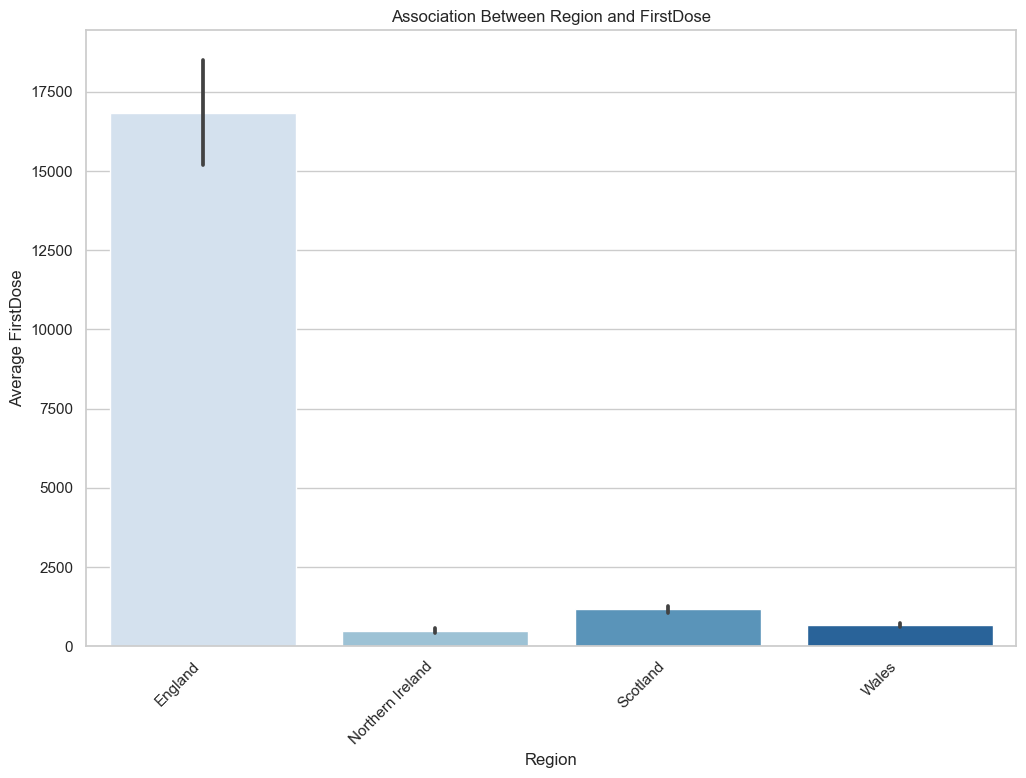

In [85]:

sns.set(style="whitegrid")

# Plotting bar graph to visualize the association
plt.figure(figsize=(12, 8))
sns.barplot(x='areaName', y='FirstDose', data=df, palette='Blues')
plt.title('Association Between Region and FirstDose')
plt.xlabel('Region')
plt.ylabel('Average FirstDose')
plt.xticks(rotation=45, ha='right')
plt.show()


# The above graph clearly exibits that the highest average of first doses was in England, followed by Scotland, Wales and Northern Ireland

# Question 3D: Visualizing relationship between more than 2 variables

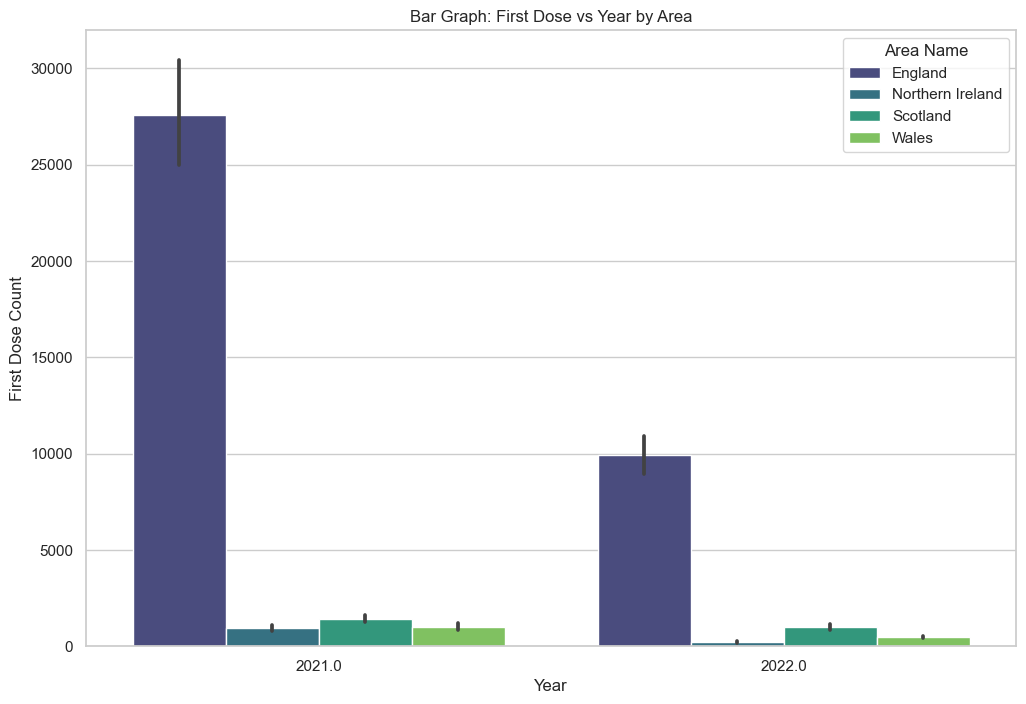

In [86]:

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Plot a bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='year', y='FirstDose', hue='areaName', data=df,
            palette='viridis')

# Customize the plot
plt.title('Bar Graph: First Dose vs Year by Area')
plt.xlabel('Year')
plt.ylabel('First Dose Count')
plt.legend(title='Area Name', loc='upper right')

# Show the plot
plt.show()






# The graphical representation demonstrates that the preeminent count of first doses is observed in England for the years 2021 and 2022, with a noticeable decline. Scotland consistently secures the second-highest position in the count of first doses for both years. In 2021, the counts for the first dose in Wales and Northern Ireland are approximately equivalent, but in 2022, Wales surpasses Northern Ireland in first dose count.

# Conclusively, the data indicates a decline in the count of first doses from 2021 to 2022 across England, Northern Ireland, Scotland, and Wales. This suggests a potential shift in vaccination preferences, with a notable inclination towards vaccination in the year 2021.

# Question 4: Display unique values of a categorical variable and their frequencies.

In [87]:

# Displaying unique values of a categorical variable

categorical_variable_counts = df['areaName'].value_counts()

# Display the unique values and their frequencies
print(categorical_variable_counts)


England             235
Northern Ireland    233
Scotland            218
Wales               204
Name: areaName, dtype: int64


It can be seen that there are 235 unique values for England, 233 for Northern Ireland, 218 unique values for Scotland and 204 for Wales

# Question 5:  Build a contingency table of two potentially related categorical variables. Conduct a statistical test of the independence between them and interpret the results.

In [24]:

from scipy.stats import chi2_contingency


crosstab_result = pd.crosstab(df['areaName'], df['day'])

# Display the contingency table
print("Contingency Table:")
print(crosstab_result)

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(crosstab_result)

# Display the test statistics and p-value
print("\nChi-squared test statistics:", chi2)
print("P-value:", p)

# Interpret the results
alpha = 0.05
if p < alpha:
    print("\nReject the null hypothesis: The variables are dependent.")
else:
    print("\nFail to reject the null hypothesis:The variables are independent.")


Contingency Table:
day               Fri  Mon  Sat  Sun  Thu  Tue  Wed
areaName                                           
England            34   34   34   34   33   33   33
Northern Ireland   33   34   34   33   33   33   33
Scotland           32   31   32   31   30   31   31
Wales              29   30   29   29   29   29   29

Chi-squared test statistics: 0.097956372463341
P-value: 1.0

Fail to reject the null hypothesis: The variables are independent.


# The above chi square test was performed to check whether there is any association between the countries and the day of the week. It was believed that the there might be a significant association between the country and the day of the week. The significance level for the test was 5% or 0.05.

#The null hypothesis (a claim made some other person) for this test is "There is no significant association between country and day of the week"
#The alternative hypothesis being "There is significant relationship between country and day of the week"

# Since the p-value is greater than the significance level we fail to reject the null hypothesis and we conclude that there is no associaiton between the  country and day of the week

# Question 6: Retrieve one or more subset of rows based on two or more criteria and present descriptive statistics on the subset(s)

In [90]:
# Define criteria for the subset
dose_criteria = (df['FirstDose'] > 10000) & (df['SecondDose'] > 10000)
country_criteria = df['areaName'] == 'England'

# Specify columns to include in the subset
subset_columns = ['areaName', 'Quarter', 'day', 'WorkingDay', 'FirstDose',
                  +'SecondDose', 'ThirdDose']

# Apply criteria to filter the subset and select columns
subset = df.loc[dose_criteria & country_criteria, subset_columns]

# Display descriptive statistics on the subset
subset_statistics = subset.describe()
print("Descriptive Statistics for the Subset:")
print(subset_statistics)



Descriptive Statistics for the Subset:
           FirstDose    SecondDose      ThirdDose
count     135.000000    135.000000     135.000000
mean    24394.577778  24135.400000  225679.118519
std     11892.141211   8054.742555  181359.166106
min     10058.000000  10085.000000   10344.000000
25%     16652.000000  18888.500000   86369.000000
50%     21775.000000  23489.000000  199008.000000
75%     30627.000000  27417.000000  316754.500000
max    115551.000000  48491.000000  830403.000000


# The above descriptive analytics is for the data where the number of FirstDose and SecondDose is higher than 10,000 in England. The standard deviaiton has been the highest for the third dose and lowest for the second dose indicating higher volatility for the third dose over the second dose. The range is highest for the first dose and lowest for the third dose

# Question 7: Conduct a statistical test of the significance of the difference between the means of two subsets of the data and interpret the results

In [91]:

from scipy.stats import ttest_ind

# Perform the t-test for England and Scotland
t_stat, p_value = ttest_ind(df.loc[df['areaName'] == 'England', 'FirstDose'],
                            df.loc[df['areaName'] == 'Scotland', 'FirstDose'],
                            equal_var=False)

# Display the test statistics and p-value
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis: There is a significant difference between the means.")
else:
    print("\nFail to reject the null hypothesis: There is no significant difference between the means.")


T-statistic: 18.763998727738976
P-value: 9.917617413006553e-49

Reject the null hypothesis: There is a significant difference between the means.


# The hypothesis test aimed to investigate whether the mean of the first dose in England differs from that in Scotland. The test was conducted at a significance level of 5% (α = 0.05) with the null hypothesis stating 'There is no difference between the means' and the alternative hypothesis proposing 'There is a significant difference between the means.' Given the obtained p-value exceeding the significance level, we reject the null hypothesis. Consequently, we infer that there is a significant difference in the means of the first dose between the two subsets.

# Question 8: Table 1

In [31]:

# Group by 'areaName' and calculate the mean for relevant columns
area_mean_table = df.groupby('areaName')[['FirstDose', 'SecondDose',
                                          'ThirdDose']].mean()

# Display the table
print("Table Grouped by 'areaName' and Mean:")
print(area_mean_table)



Table Grouped by 'areaName' and Mean:
                     FirstDose    SecondDose      ThirdDose
areaName                                                   
England           16819.131915  18418.595745  136510.710638
Northern Ireland    494.060086    573.733906    4812.077253
Scotland           1162.582569   1578.766055   14989.770642
Wales               663.504902    866.392157    8181.338235


# The mean counts for the First and Second doses exhibit the highest values in England, succeeded by Scotland, Wales, and Northern Ireland. Notably, Scotland records the highest count for the Third Dose, followed by England, Wales, and Northern Ireland. The Third Dose count for Scotland, Wales, and Northern Ireland is approximately eight times that of the Second Dose. This suggests an uneven availability of the vaccine across the four countries for the initial two doses, while the distribution appears to have been more equitable for the third dose.

# Question 8: Table 2

In [92]:

# Group by 'day' and calculate the mean for each group, excluding 'year' and 'month'
day_mean_table = df.groupby('day').mean(numeric_only=True).
drop(['year', 'month'], axis=1)

# Display the table
print("\nTable Grouped by 'day' and Mean:")
print(day_mean_table)




Table Grouped by 'day' and Mean:
       FirstDose   SecondDose     ThirdDose
day                                        
Fri  4946.210938  5571.867188  41768.976562
Mon  4453.248062  4946.682171  37776.085271
Sat  5515.364341  6728.480620  47488.899225
Sun  3611.031496  4267.913386  29193.220472
Thu  5386.264000  5940.584000  48641.760000
Tue  5238.706349  5672.269841  45649.976190
Wed  5915.738095  6066.396825  49624.809524


# Following conclusions can be drawn
# 1) Wednesdays consistently exhibit the highest mean counts for all doses, suggesting heightened vaccination activity on this day.
# 2) Mondays demonstrate notable vaccination activity, ranking second in mean counts for all doses, indicating an increased emphasis on vaccination at the start of the week
# 3) Sundays consistently demonstrate lower mean counts across all doses, indicating a comparatively lower vaccination activity on Sundays
# 4) Saturdays reveal a preference for the Second Dose, having the highest mean count for this particular dose
# 5) Fridays stand out with the highest mean count for the Third Dose, emphasizing a particular focus on third-dose vaccinations towards the end of the week.

In [93]:
#Question 9

import pandas as pd
import statsmodels.api as sm

# Assuming df is your original DataFrame
# Create dummy variables for 'areaName' using one-hot encoding
df_with_dummies = pd.get_dummies(df, columns=['areaName'], drop_first=True)

# Selecting the independent variables (features)
X = df_with_dummies[['FirstDose', 'SecondDose', 'areaName_Scotland', 
                     'areaName_Wales', 'areaName_Northern Ireland']]

# Adding a constant to the features (required for the statsmodels OLS model)
X = sm.add_constant(X)

# Selecting the dependent variable
y = df_with_dummies['ThirdDose']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())





                            OLS Regression Results                            
Dep. Variable:              ThirdDose   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     418.6
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          3.35e-230
Time:                        22:46:58   Log-Likelihood:                -11014.
No. Observations:                 890   AIC:                         2.204e+04
Df Residuals:                     884   BIC:                         2.207e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# Following conclusions can be drawn from the above Regression Model

# 1) The adjusted R-squared value of 0.701 indicates that the model can accurately explain 70.1% of the variability in the dependent variable.

# 2) All coefficients exhibit p-values below 0.05, signifying their statistical significance for predicting the data. This implies that the model is parsimonious.

# 3) The probability of the Jarque-Bera test being less than 0.05 suggests that the standardized residuals do not follow a normal distribution.

# 4) A skewness value of 1.293 indicates rightward skewness in the standardized residuals.

# 5) The notes indicate the possibility of multicollinearity in the model.

# Considering points 3, 4, and 5, it can be inferred that the model violates linear regression assumptions, rendering it inadequate.

In [117]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NOTEBOOK_FULL_PATH = '" + nb.notebook_path + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [118]:
import io
from nbformat import read, NO_CONVERT

with io.open(NOTEBOOK_FULL_PATH.split("/")[-1], 'r', encoding='utf-8') as f:
    nb = read(f, NO_CONVERT)

word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(f"Word count: {word_count}")

Word count: 1356
